In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [186]:
df = pd.read_csv('marketing_campaign.csv', sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [187]:
#check dataset size
df.shape

(2240, 29)

### Data Preparation

In [188]:
# Make column names and values look uniform
df.columns = df.columns.str.lower()

categorical_cols = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_cols:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [189]:
# convert year_birth column to age
df['age'] = 2024 - df['year_birth']

# then drop year_birth
del df['year_birth']

In [190]:
# convert dt_customer to customer tenure 
df['customer_days'] = (pd.to_datetime('today') - pd.to_datetime(df['dt_customer'])).dt.days

# drop dt_customer
del df['dt_customer']

In [191]:
df.columns

Index(['id', 'education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'complain', 'z_costcontact', 'z_revenue', 'response', 'age',
       'customer_days'],
      dtype='object')

In [192]:
# checking for redundant columns
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"DROP: {col} - only has 1 unique value: {df[col].unique()[0]}")

DROP: z_costcontact - only has 1 unique value: 3
DROP: z_revenue - only has 1 unique value: 11


In [193]:
df.drop(['z_costcontact', 'z_revenue'], axis=1, inplace=True)

In [194]:
df.marital_status.unique()

array(['single', 'together', 'married', 'divorced', 'widow', 'alone',
       'absurd', 'yolo'], dtype=object)

In [195]:
df = df[~df['marital_status'].isin(['alone', 'absurd', 'yolo'])]

Creating aggregated columns for extra features and better marketing info:

In [196]:
# create total purchase
purchase_cols = ['numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
                 'numstorepurchases']

df['total_purchases'] = df[purchase_cols].sum(axis=1)

# create total spending
spending_cols = ['mntwines', 'mntfruits', 'mntmeatproducts',
                 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']

df['total_spending'] = df[spending_cols].sum(axis=1)


# create previous campaign response rate
df['previous_response_rate'] = df[['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 
                                    'acceptedcmp4', 'acceptedcmp5']].sum(axis=1) / 5

In [197]:
df.head()

,id,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,customer_days,total_purchases,total_spending,previous_response_rate
0,5524,graduation,single,58138.0,0,0,58,635,88,546,...,0,0,0,0,1,67,4823,25,1617,0.0
1,2174,graduation,single,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,70,4273,6,27,0.0
2,4141,graduation,together,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,59,4472,21,776,0.0
3,6182,graduation,together,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,40,4299,8,53,0.0
4,5324,phd,married,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,43,4321,19,422,0.0


In [198]:
df.complain.unique()

array([0, 1])

In [199]:
df.isnull().sum()

id                         0
education                  0
marital_status             0
income                    24
kidhome                    0
teenhome                   0
recency                    0
mntwines                   0
mntfruits                  0
mntmeatproducts            0
mntfishproducts            0
mntsweetproducts           0
mntgoldprods               0
numdealspurchases          0
numwebpurchases            0
numcatalogpurchases        0
numstorepurchases          0
numwebvisitsmonth          0
acceptedcmp3               0
acceptedcmp4               0
acceptedcmp5               0
acceptedcmp1               0
acceptedcmp2               0
complain                   0
response                   0
age                        0
customer_days              0
total_purchases            0
total_spending             0
previous_response_rate     0
dtype: int64

In [200]:
df['income'] = df['income'].fillna(0)

### Setting up the validation framework

In [201]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [202]:
len(df_train), len(df_val), len(df_test)

(1339, 447, 447)

In [203]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [204]:
y_train = df_train.response.values
y_test = df_test.response.values
y_val = df_val.response.values

In [205]:
del df_train['response']
del df_test['response']
del df_val['response']

### EDA

In [206]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.response.value_counts(normalize=True)

response
0    0.858343
1    0.141657
Name: proportion, dtype: float64

Rate of response to last marketing campaign:

In [207]:
global_response_rate = df_full_train.response.mean()
round(global_response_rate, 2)

np.float64(0.14)

In [208]:
df.dtypes

id                          int64
education                  object
marital_status             object
income                    float64
kidhome                     int64
teenhome                    int64
recency                     int64
mntwines                    int64
mntfruits                   int64
mntmeatproducts             int64
mntfishproducts             int64
mntsweetproducts            int64
mntgoldprods                int64
numdealspurchases           int64
numwebpurchases             int64
numcatalogpurchases         int64
numstorepurchases           int64
numwebvisitsmonth           int64
acceptedcmp3                int64
acceptedcmp4                int64
acceptedcmp5                int64
acceptedcmp1                int64
acceptedcmp2                int64
complain                    int64
response                    int64
age                         int64
customer_days               int64
total_purchases             int64
total_spending              int64
previous_respo

In [209]:
df.columns

Index(['id', 'education', 'marital_status', 'income', 'kidhome', 'teenhome',
       'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'complain', 'response', 'age', 'customer_days', 'total_purchases',
       'total_spending', 'previous_response_rate'],
      dtype='object')

In [210]:
categorical = ['education', 'marital_status']

numerical = ['income', 'kidhome', 'teenhome',
       'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'complain', 'age', 'customer_days', 'total_purchases',
       'total_spending', 'previous_response_rate']

### Feature Importance

**Risk Ratio**

In [211]:
from IPython.display import display

In [212]:
for c in categorical:
    df_group = df_full_train.groupby(c).response.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_response_rate
    df_group['ratio'] = df_group['mean'] / global_response_rate
    display(df_group)
    print()
    print()

,mean,count,diff,ratio
education,,,,
2n_cycle,0.102564,156,-0.039093,0.724030
basic,0.021277,47,-0.120381,0.150198
graduation,0.134078,895,-0.007579,0.946497
master,0.148026,304,0.006369,1.044960
phd,0.184896,384,0.043238,1.305233


,mean,count,diff,ratio
marital_status,,,,
divorced,0.196891,193,0.055234,1.389912
married,0.112216,704,-0.029441,0.792164
single,0.215259,367,0.073602,1.519574
together,0.096983,464,-0.044675,0.684629
widow,0.206897,58,0.065239,1.460542


**Mutual Information**

In [213]:
from sklearn.metrics import mutual_info_score

In [214]:
def mutual_info_response_score(series):
    return mutual_info_score(series, df_full_train.response)

In [215]:
mi = df_full_train[categorical].apply(mutual_info_response_score)
mi.sort_values(ascending=False)

marital_status    0.009647
education         0.004597
dtype: float64

**Correlation**

In [216]:
correlation = df_full_train[numerical].corrwith(df_full_train.response)
correlation.sort_values(ascending=False)

previous_response_rate    0.450433
acceptedcmp5              0.372272
total_spending            0.296994
acceptedcmp1              0.292491
acceptedcmp3              0.284176
mntwines                  0.274521
mntmeatproducts           0.271077
numcatalogpurchases       0.249068
total_purchases           0.175730
acceptedcmp2              0.175719
mntgoldprods              0.170853
acceptedcmp4              0.170496
customer_days             0.169508
income                    0.163176
numwebpurchases           0.161967
mntfruits                 0.147336
mntsweetproducts          0.119898
mntfishproducts           0.115182
numstorepurchases         0.056674
numdealspurchases         0.006588
complain                 -0.004542
age                      -0.020935
numwebvisitsmonth        -0.033168
kidhome                  -0.079323
teenhome                 -0.146090
recency                  -0.203314
dtype: float64

Customers who responded to past campaigns are much more likely to respond again (previous_response_rate -0.432156)
Recent campaign acceptance is highly predictive acceptedcmp5 (0.339) - Second best
total_spending (0.272) - High spenders are more responsive

Risk Ratio Insights
Education:

PhD holders: 1.64x more likely to respond (best segment!) while Basic education: 0.39x (much less likely). The higher the education, the better the chances of responding.

Marital Status:
Single: 1.24x more likely

### One Hot Encoding

In [217]:
from sklearn.feature_extraction import DictVectorizer

In [218]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

### Logistic Regression

In [219]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [220]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred[:10]

array([0.17975121, 0.04580868, 0.2249883 , 0.02035436, 0.02146021,
       0.02847524, 0.05745036, 0.05423115, 0.01794679, 0.13352777])

In [221]:
# check model for overfitting
train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)

print(f"Training Accuracy: {train_score:.4f}")
print(f"Val Accuracy: {val_score:.4f}")
print(f"Difference: {train_score - val_score:.4f}")

Training Accuracy: 0.8805
Val Accuracy: 0.8725
Difference: 0.0080


In [222]:
# checking model acccuracy at threshold 0.5

response_decision = (y_pred >= 0.5)
df_pred = pd.DataFrame({
    'probability': y_pred,
    'prediction': response_decision.astype(int),
    'actual_value': y_val
})
df_pred['correct'] = (df_pred['prediction'] == df_pred['actual_value'])

df_pred.head(10)  


,probability,prediction,actual_value,correct
0,0.179751,0,0,True
1,0.045809,0,0,True
2,0.224988,0,1,False
3,0.020354,0,0,True
4,0.021460,0,0,True
5,0.028475,0,0,True
6,0.057450,0,0,True
7,0.054231,0,0,True
8,0.017947,0,0,True
9,0.133528,0,0,True


In [223]:
print(len(y_val))

# ratio of accurate predictions
print((y_val == response_decision).mean())

# number of accurate predictions at t=0.5
print((y_val == response_decision).sum())

447
0.87248322147651
390


### Hyperparameters tuning

**Checking model accuracy at other thresholds:**

In [224]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    response_decision = (y_pred >= t)
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' %(t, score))
    scores.append(score)

0.00 0.152
0.05 0.416
0.10 0.660
0.15 0.794
0.20 0.841
0.25 0.866
0.30 0.870
0.35 0.881
0.40 0.872
0.45 0.877
0.50 0.872
0.55 0.870
0.60 0.868
0.65 0.859
0.70 0.857
0.75 0.850
0.80 0.848
0.85 0.848
0.90 0.848
0.95 0.848
1.00 0.848


In [225]:
#checking for data imbalance:
y_val.mean()

np.float64(0.15212527964205816)

Data is imbalanced. only 15% of customers respond, the remaining 85% do not. In this case, the accuracy score doesn't tell us how accurate the model is. Logistic regression will be biased toward the majority class.

### Calculating precision, recall and F1 score at different thresholds

In [226]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [227]:
precision_list = []
recall_list = []
f1_list = []

thresholds = np.linspace(0, 1, 21)

for t in thresholds:
    y_pred_t = (y_pred >= t).astype(int)
    
    precision_list.append(precision_score(y_val, y_pred_t, zero_division=0))
    recall_list.append(recall_score(y_val, y_pred_t, zero_division=0))
    f1_list.append(f1_score(y_val, y_pred_t, zero_division=0))

In [228]:
df_scores = pd.DataFrame({
    'thresholds': thresholds,
    'precision': precision_list,
    'recall': recall_list,
    'f1_score': f1_list
})

df_scores

,thresholds,precision,recall,f1_score
0,0.00,0.152125,1.000000,0.264078
1,0.05,0.191693,0.882353,0.314961
2,0.10,0.285714,0.823529,0.424242
3,0.15,0.401639,0.720588,0.515789
4,0.20,0.482353,0.602941,0.535948
5,0.25,0.564516,0.514706,0.538462
6,0.30,0.604167,0.426471,0.500000
7,0.35,0.682927,0.411765,0.513761
8,0.40,0.677419,0.308824,0.424242
9,0.45,0.760000,0.279412,0.408602


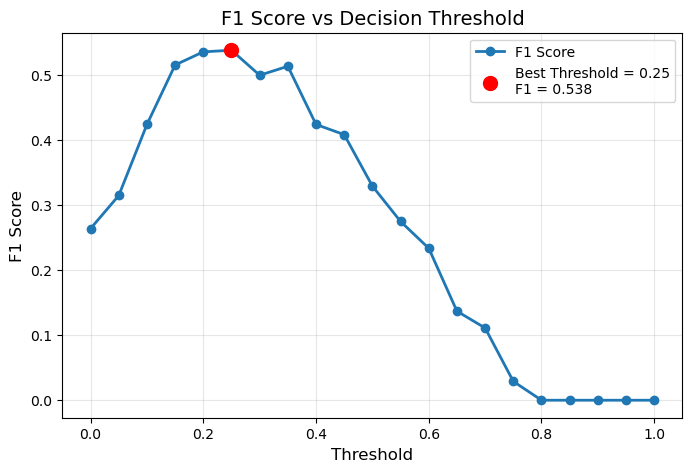

In [229]:
plt.figure(figsize=(8, 5))
plt.plot(df_scores['thresholds'], df_scores['f1_score'], marker='o', label='F1 Score', linewidth=2)

# Highlight best point
best_idx = df_scores['f1_score'].idxmax()
best_threshold = df_scores.loc[best_idx, 'thresholds']
best_f1 = df_scores.loc[best_idx, 'f1_score']

plt.scatter(best_threshold, best_f1, color='red', s=100, zorder=5, label=f'Best Threshold = {best_threshold:.2f}\nF1 = {best_f1:.3f}')

plt.title('F1 Score vs Decision Threshold', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


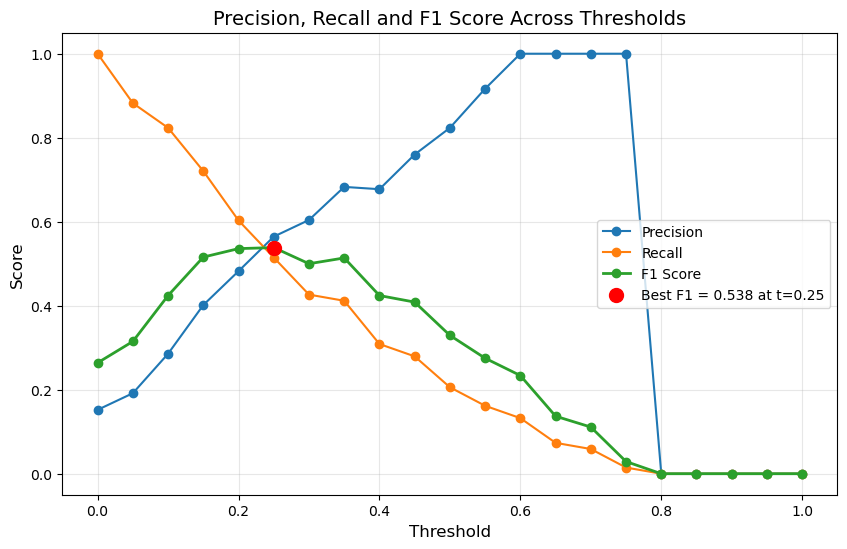

In [230]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df_scores['thresholds'], df_scores['precision'], marker='o', label='Precision')
plt.plot(df_scores['thresholds'], df_scores['recall'], marker='o', label='Recall')
plt.plot(df_scores['thresholds'], df_scores['f1_score'], marker='o', label='F1 Score', linewidth=2)

# Highlight best F1 point
best_idx = df_scores['f1_score'].idxmax()
best_threshold = df_scores.loc[best_idx, 'thresholds']
best_f1 = df_scores.loc[best_idx, 'f1_score']

plt.scatter(best_threshold, best_f1, color='red', s=100, zorder=5,
            label=f'Best F1 = {best_f1:.3f} at t={best_threshold:.2f}')

plt.title('Precision, Recall and F1 Score Across Thresholds', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()


### Confusion Matrix

In [231]:
from sklearn.metrics import confusion_matrix

# choose your threshold
t = 0.20

# convert probabilities → binary predictions
y_pred_t = (y_pred >= t).astype(int)

# confusion matrix
cm = confusion_matrix(y_val, y_pred_t)

cm


array([[335,  44],
       [ 27,  41]])

In [232]:
cm_df = pd.DataFrame(
    cm,
    index=['Actual 0 (No Response)', 'Actual 1 (Response)'],
    columns=['Predicted 0', 'Predicted 1']
)

cm_df

,Predicted 0,Predicted 1
Actual 0 (No Response),335,44
Actual 1 (Response),27,41


In [233]:
(cm / cm.sum()).round(2)

array([[0.75, 0.1 ],
       [0.06, 0.09]])

Our model:

Is good at avoiding wasted spend (high TN, low FP)

Has moderate ability to find responders (TP is decent but FN is also sizeable)

Has a reasonable precision (because FP is low)

Has moderate recall (because FN isn’t tiny)

If the business cares more about:

Minimizing wasted marketing cost → this model is good

Capturing every possible responder → we need a lower threshold to increase recall

### ROC Curve and ROC AUC

In [234]:
from sklearn.metrics import roc_curve, roc_auc_score

Auc Score:0.8148766102747168


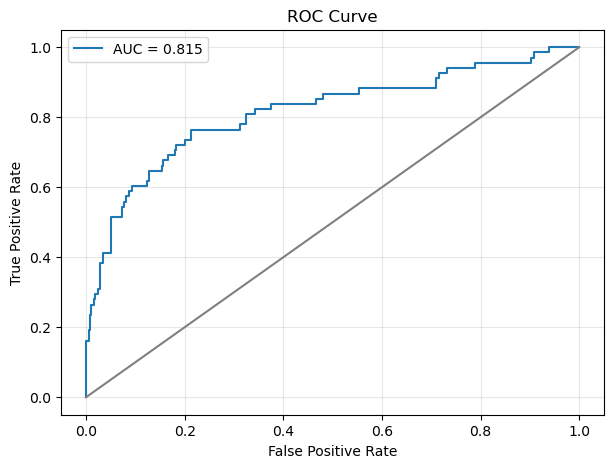

In [235]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

auc = roc_auc_score(y_val, y_pred)
print(f'Auc Score:{auc}')

# Plot ROC

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], color='gray')  

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Hyperparameter tuning with k-fold cross validation

In [236]:
# function for model training:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

In [237]:
# prediction function:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [238]:
from sklearn.model_selection import KFold

In [239]:
n_splits = 5
C_values = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]

for C in C_values:
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_fold_train = df_full_train.iloc[train_idx]
        df_fold_val = df_full_train.iloc[val_idx]

        y_fold_train = df_fold_train.response.values
        y_fold_val = df_fold_val.response.values

        dv, model = train(df_fold_train, y_fold_train, C=C)
        y_fold_pred = predict(df_fold_val, dv, model)

        auc = roc_auc_score(y_fold_val, y_fold_pred)
        scores.append(auc)

    print(f'C={C} {np.mean(scores):.3f} +- {np.std(scores):.3f}')


C=0.001 0.800 +- 0.024
C=0.01 0.814 +- 0.020
C=0.1 0.812 +- 0.033
C=0.5 0.823 +- 0.017
C=1 0.835 +- 0.021
C=5 0.827 +- 0.021
C=10 0.818 +- 0.020


In [240]:
#final model training:
dv, model = train(df_full_train, df_full_train.response.values, C=1.0)
y_pred = predict(df_val, dv, model)

auc = roc_auc_score(y_val, y_pred)
auc

np.float64(0.8518159242588857)

### Random Forest Model

In [241]:
from sklearn.ensemble import RandomForestClassifier

In [242]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [243]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.8808590718609344)

**Tuning the random forest model:**

Evaluating the performance of the model as the number of estimators change:

In [244]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [245]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.880859
1,20,0.889628
2,30,0.899057
3,40,0.896399
4,50,0.901463
5,60,0.904082
6,70,0.907380
7,80,0.910523
8,90,0.911512
9,100,0.908738


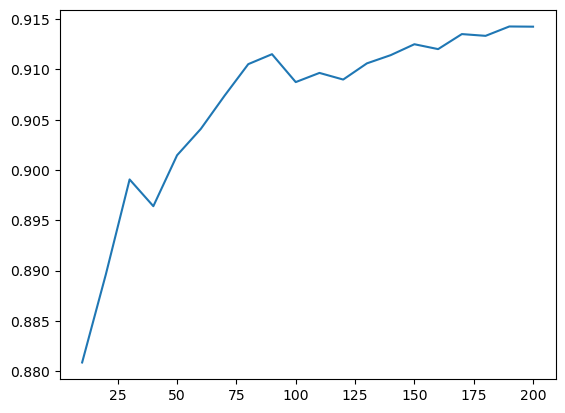

In [246]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.show()

Evaluating the performance of the model as number of estimators, max_depth change:

In [247]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((d, n, auc))

In [248]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.858529
1,5,20,0.886136
2,5,30,0.888794
3,5,40,0.885185
4,5,50,0.887281


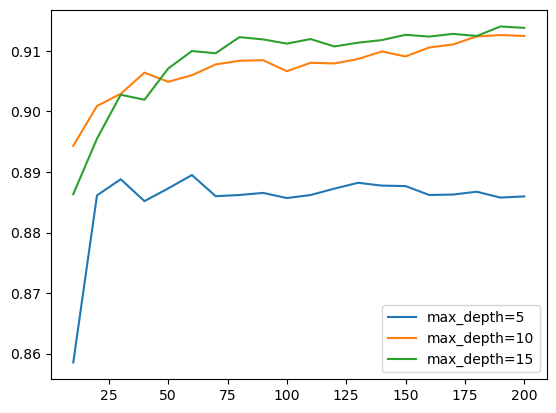

In [249]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth==d]
    plt.plot(df_subset.n_estimators, df_subset.auc, 
             label = f'max_depth={d}')

plt.legend()
plt.show()

Evaluating different min_leaf_samples values:

In [250]:
max_depth = 15

In [251]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, min_samples_leaf=s, random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((s, n, auc))

In [252]:
columns=['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.886330
1,1,20,0.895507
2,1,30,0.902763
3,1,40,0.901928
4,1,50,0.907089


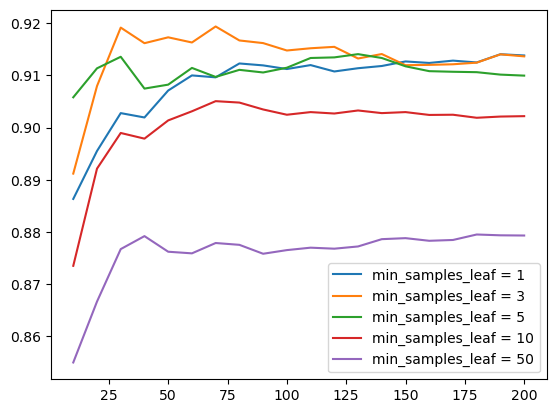

In [253]:
for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, 
             label = f'min_samples_leaf = {s}')

plt.legend()
plt.show()

In [254]:
min_samples_leaf = 3

#final model:

rf = RandomForestClassifier(n_estimators=n, 
                            max_depth=max_depth, 
                            min_samples_leaf=min_samples_leaf, 
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [255]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.9136271923017228)

### XGBoost Model

In [256]:
!pip install xgboost

In [257]:
import xgboost as xgb

In [258]:
# create DMatrix
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [259]:
watchlist=[(dtrain, 'train'), (dval, 'val')]

In [260]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1, 
    'objective': 'binary:logistic',           
    'nthread': 8, 
    'seed': 1, 
    'verbosity':1,
    'eval_metric': 'auc'
    
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [261]:
y_pred = model.predict(dval)

In [262]:
roc_auc_score(y_val, y_pred)

np.float64(0.8752328108024214)

Evaluate model on 200 trees, print out results in a dataframe, and visualize results:

In [263]:
evals_result = {}
model = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=200,
    evals=watchlist,
    evals_result=evals_result,
    verbose_eval=False,
)

df_score = pd.DataFrame({
    'num_iter': list(range(200)),
    'train_auc': evals_result['train']['auc'],
    'val_auc': evals_result['val']['auc']
})
df_score

,num_iter,train_auc,val_auc
0,0,0.929823,0.804070
1,1,0.950799,0.837110
2,2,0.967434,0.851214
3,3,0.976844,0.858936
4,4,0.982477,0.862157
...,...,...,...
195,195,0.999810,0.926626
196,196,0.999810,0.926548
197,197,0.999810,0.926820
198,198,0.999810,0.926975


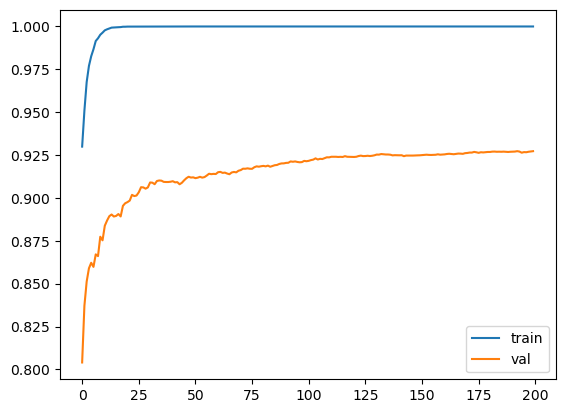

In [264]:
# plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
plt.show()

### **XGBoost parameters tuning:**
- **Tuning eta:**

In [265]:
etas = [0.1, 0.05, 0.01]
scores = {}

for eta in etas:
    xgb_params = {
        'eta': eta,
        'max_depth': 6,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'seed': 1,
        'verbosity': 0
    }
    
    evals_result = {}
    model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=200,
        evals=watchlist,
        evals_result=evals_result,
        verbose_eval=False
    )
    
    # Store results with eta as key
    key = f"eta={eta}"
    scores[key] = pd.DataFrame({
        'num_iter': list(range(200)),
        'train_auc': evals_result['train']['auc'],
        'val_auc': evals_result['val']['auc']
    })
    
    print(f"{key}: Best AUC = {max(evals_result['val']['auc']):.4f}")


eta=0.1: Best AUC = 0.9255
eta=0.05: Best AUC = 0.9215
eta=0.01: Best AUC = 0.8879


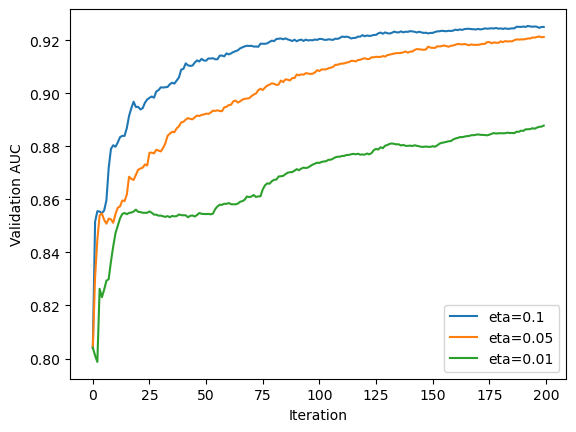

In [266]:
# Plot different etas
for eta_key in scores.keys():
    df_score = scores[eta_key]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta_key)
plt.xlabel('Iteration')
plt.ylabel('Validation AUC')
plt.legend()
plt.show()

eta = 0.1

**Tuning max_depth:**

In [267]:
max_depth = [3, 5, 8, 10]
scores = {}

for m in max_depth:
    xgb_params = {
        'eta': 0.1,
        'max_depth': m,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'seed': 1,
        'verbosity': 0
    }
    
    evals_result = {}
    model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=200,
        evals=watchlist,
        evals_result=evals_result,
        verbose_eval=False
    )
    
    # Store results with eta as key
    key = f"max_depth={m}"
    scores[key] = pd.DataFrame({
        'num_iter': list(range(200)),
        'train_auc': evals_result['train']['auc'],
        'val_auc': evals_result['val']['auc']
    })
    
    print(f"{key}: Best AUC = {max(evals_result['val']['auc']):.4f}")

max_depth=3: Best AUC = 0.9128
max_depth=5: Best AUC = 0.9200
max_depth=8: Best AUC = 0.9239
max_depth=10: Best AUC = 0.9273


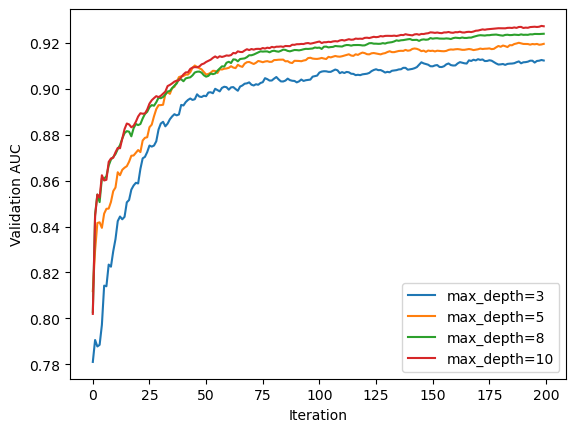

In [268]:
for max_depth_key in scores.keys():
    df_score = scores[max_depth_key]
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth_key)
plt.xlabel('Iteration')
plt.ylabel('Validation AUC')
plt.legend()
plt.show()

**Max_depth = 10**

**Tuning min_child_weight**

In [269]:
min_child_weight = [1, 30, 10]
scores = {}

for m in min_child_weight:
    xgb_params = {
        'eta': 0.1,
        'max_depth': 10,
        'min_child_weight': m,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'seed': 1,
        'verbosity': 0
    }
    
    evals_result = {}
    model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=200,
        evals=watchlist,
        evals_result=evals_result,
        verbose_eval=False
    )
    
    # Store results with eta as key
    key = f"min_child_weight={m}"
    scores[key] = pd.DataFrame({
        'num_iter': list(range(200)),
        'train_auc': evals_result['train']['auc'],
        'val_auc': evals_result['val']['auc']
    })
    
    print(f"{key}: Best AUC = {max(evals_result['val']['auc']):.4f}")

min_child_weight=1: Best AUC = 0.9273
min_child_weight=30: Best AUC = 0.9002
min_child_weight=10: Best AUC = 0.9275


**min_child_weight = 1**

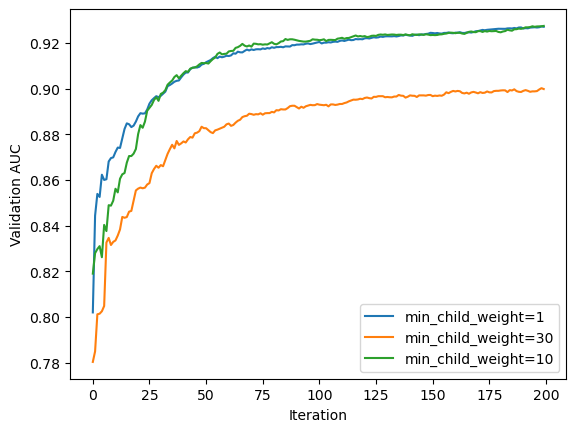

In [270]:
for min_child_weight in scores.keys():
    df_score = scores[min_child_weight]
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.xlabel('Iteration')
plt.ylabel('Validation AUC')
plt.legend()
plt.show()

**Tuning subsample_values:**

In [271]:
subsample_values = [0.5, 0.7, 0.9, 1.0]
scores = {}

for s in subsample_values:
    xgb_params = {
        'eta': 0.1,
        'max_depth': 10,
        'min_child_weight': 1,
        'subsample': s,
        'colsample_bytree': 1.0,
        'lambda': 1,
        'alpha': 0,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'seed': 1,
        'verbosity': 0
    }

    evals_result = {}
    model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=200,
        evals=watchlist,
        evals_result=evals_result,
        verbose_eval=False
    )

    key = f"subsample={s}"
    scores[key] = pd.DataFrame({
        'num_iter': range(200),
        'train_auc': evals_result['train']['auc'],
        'val_auc': evals_result['val']['auc'],
    })

    print(f"{key}: Best val AUC = {max(evals_result['val']['auc']):.4f}")


subsample=0.5: Best val AUC = 0.9334
subsample=0.7: Best val AUC = 0.9322
subsample=0.9: Best val AUC = 0.9301
subsample=1.0: Best val AUC = 0.9273


**Subsample = 0.5**

**Tuning colsample_values:**

In [272]:
colsample_values = [0.3, 0.5, 0.7, 1.0]
scores = {}

for c in colsample_values:
    xgb_params = {
        'eta': 0.1,
        'max_depth': 10,
        'min_child_weight': 1,
        'subsample': 0.5,
        'colsample_bytree': c,
        'lambda': 1,
        'alpha': 0,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'seed': 1,
        'verbosity': 0
    }

    evals_result = {}
    model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=200,
        evals=watchlist,
        evals_result=evals_result,
        verbose_eval=False
    )

    key = f"colsample_bytree={c}"
    scores[key] = pd.DataFrame({
        'num_iter': range(200),
        'train_auc': evals_result['train']['auc'],
        'val_auc': evals_result['val']['auc'],
    })

    print(f"{key}: Best val AUC = {max(evals_result['val']['auc']):.4f}")


colsample_bytree=0.3: Best val AUC = 0.9155
colsample_bytree=0.5: Best val AUC = 0.9270
colsample_bytree=0.7: Best val AUC = 0.9252
colsample_bytree=1.0: Best val AUC = 0.9334


**Tuning lambda_values:**

In [273]:
lambda_values = [0, 1, 5, 10]
scores = {}

for l in lambda_values:
    xgb_params = {
        'eta': 0.1,
        'max_depth': 10,
        'min_child_weight': 1,
        'subsample': 0.5,
        'colsample_bytree': 1.0,
        'lambda': l,
        'alpha': 0,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'seed': 1,
        'verbosity': 0
    }

    evals_result = {}
    model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=200,
        evals=watchlist,
        evals_result=evals_result,
        verbose_eval=False
    )

    key = f"lambda={l}"
    scores[key] = pd.DataFrame({
        'num_iter': range(200),
        'train_auc': evals_result['train']['auc'],
        'val_auc': evals_result['val']['auc'],
    })

    print(f"{key}: Best val AUC = {max(evals_result['val']['auc']):.4f}")


lambda=0: Best val AUC = 0.9362
lambda=1: Best val AUC = 0.9334
lambda=5: Best val AUC = 0.9261
lambda=10: Best val AUC = 0.9236


In [274]:
alpha_values = [0, 0.5, 1, 2, 5]
scores = {}

for a in alpha_values:
    xgb_params = {
        'eta': 0.1,
        'max_depth': 10,
        'min_child_weight': 1,
        'subsample': 0.5,
        'colsample_bytree': 1.0,
        'lambda': 0,
        'alpha': a,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'seed': 1,
        'verbosity': 0
    }

    evals_result = {}
    model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=200,
        evals=watchlist,
        evals_result=evals_result,
        verbose_eval=False
    )

    key = f"alpha={a}"
    scores[key] = pd.DataFrame({
        'num_iter': range(200),
        'train_auc': evals_result['train']['auc'],
        'val_auc': evals_result['val']['auc'],
    })

    print(f"{key}: Best val AUC = {max(evals_result['val']['auc']):.4f}")


alpha=0: Best val AUC = 0.9362
alpha=0.5: Best val AUC = 0.9248
alpha=1: Best val AUC = 0.9266
alpha=2: Best val AUC = 0.9302
alpha=5: Best val AUC = 0.9181


**Final XGBoost Model:**

In [275]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,
    'subsample': 0.5,
    'colsample_bytree': 1.0,
    'lambda': 0,
    'alpha': 0,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 0
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.9356278131305293)

### SELECTING THE BEST MODEL; LogisticRegression, Random forest, XGBoost

**Best LogisticRegression Model:**

In [276]:
dv, model = train(df_full_train, df_full_train.response.values, C=1.0)
y_pred = predict(df_val, dv, model)

auc = roc_auc_score(y_val, y_pred)
auc

np.float64(0.8518159242588857)

**Best Random forest model:**

In [277]:
rf = RandomForestClassifier(n_estimators=200, 
                            max_depth=15, 
                            min_samples_leaf= 3, 
                            random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.9136271923017228)

**Best XGBoost model:**

In [278]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,
    'subsample': 0.5,
    'colsample_bytree': 1.0,
    'lambda': 0,
    'alpha': 0,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 0
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

np.float64(0.9356278131305293)

**Best Model: XGBoost**

Training best model on full training dataset:

In [279]:
df_full_train

,id,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,customer_days,total_purchases,total_spending,previous_response_rate
0,10637,graduation,married,40800.0,1,2,77,24,0,27,...,0,0,0,1,0,60,4704,8,99,0.0
1,5788,graduation,together,46053.0,1,0,46,56,10,92,...,0,0,0,0,0,52,4657,12,209,0.0
2,2995,master,together,66636.0,0,0,64,291,10,689,...,0,0,0,0,0,67,4476,17,1084,0.0
3,9485,phd,married,45921.0,0,0,23,102,9,49,...,0,0,0,0,0,38,4271,10,199,0.0
4,9369,2n_cycle,single,88194.0,0,1,19,688,14,309,...,0,1,0,0,1,45,4262,32,1274,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,2456,phd,married,40233.0,0,1,84,80,4,46,...,0,0,0,0,0,49,4418,13,149,0.0
1782,6534,graduation,together,47889.0,1,0,94,29,0,29,...,0,0,0,0,0,50,4336,6,67,0.0
1783,6001,graduation,married,56775.0,0,1,62,614,35,160,...,0,0,0,0,0,45,4703,25,937,0.0
1784,7297,graduation,single,7500.0,1,0,54,5,3,10,...,0,0,0,0,0,51,4345,11,57,0.0


In [280]:
y_full_train = df_full_train.response.values
del df_full_train['response']

In [281]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [282]:
feature_names = dv.get_feature_names_out().tolist()

dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=feature_names)
dtest = xgb.DMatrix(X_test, feature_names=feature_names)

In [283]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,
    'subsample': 0.5,
    'colsample_bytree': 1.0,
    'lambda': 0,
    'alpha': 0,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 0
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)

In [284]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

np.float64(0.8729761656590925)

Create model pipeline:

In [285]:
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

In [286]:
xgb_model = XGBClassifier(
    eta=0.1,
    max_depth=10,
    min_child_weight=1,
    subsample=0.5,
    colsample_bytree=1.0,
    reg_lambda=0,
    reg_alpha=0,
    objective='binary:logistic',
    eval_metric='auc',
    nthread=8,
    random_state=1,
    verbosity=0
)

pipeline_xgb = make_pipeline(
    DictVectorizer(),
    xgb_model
)

In [287]:
train_dict = df_train.to_dict(orient='records')

In [288]:
pipeline_xgb.fit(train_dict, y_train)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1.0, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eta=0.1,
                               eval_metric='auc', feature_types=None,
                               feature_weights=None, gamma=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, ...))])

In [289]:
# try out pipeline
sample = df_val.iloc[10].to_dict()
sample

{'id': 202,
 'education': 'phd',
 'marital_status': 'widow',
 'income': 82032.0,
 'kidhome': 0,
 'teenhome': 0,
 'recency': 54,
 'mntwines': 332,
 'mntfruits': 194,
 'mntmeatproducts': 377,
 'mntfishproducts': 149,
 'mntsweetproducts': 125,
 'mntgoldprods': 57,
 'numdealspurchases': 0,
 'numwebpurchases': 4,
 'numcatalogpurchases': 6,
 'numstorepurchases': 7,
 'numwebvisitsmonth': 1,
 'acceptedcmp3': 0,
 'acceptedcmp4': 0,
 'acceptedcmp5': 0,
 'acceptedcmp1': 0,
 'acceptedcmp2': 0,
 'complain': 0,
 'age': 76,
 'customer_days': 4245,
 'total_purchases': 17,
 'total_spending': 1234,
 'previous_response_rate': 0.0}

In [296]:
#edit the sample above to create a customer
customer = {
    'id': 202,
     'education': 'masters',
     'marital_status': 'single',
     'income': 82032.0,
     'kidhome': 0,
     'teenhome': 0,
     'recency': 54,
     'mntwines': 332,
     'mntfruits': 194,
     'mntmeatproducts': 377,
     'mntfishproducts': 149,
     'mntsweetproducts': 125,
     'mntgoldprods': 57,
     'numdealspurchases': 0,
     'numwebpurchases': 4,
     'numcatalogpurchases': 6,
     'numstorepurchases': 7,
     'numwebvisitsmonth': 3,
     'acceptedcmp3': 0,
     'acceptedcmp4': 0,
     'acceptedcmp5': 1,
     'acceptedcmp1': 0,
     'acceptedcmp2': 0,
     'complain': 0,
     'age': 25,
     'customer_days': 4245,
     'total_purchases': 17,
     'total_spending': 1234,
     'previous_response_rate': 0.0
}

In [297]:
y_pred = pipeline_xgb.predict_proba([customer])[0, 1]
y_pred

np.float32(0.01310461)

Save model to pickle:

In [292]:
import pickle

In [293]:
with open ('model.bin', 'wb') as f_out:
    pickle.dump(pipeline_xgb,  f_out)

with open ('model.bin', 'rb') as f_in:
    pipeline_xgb = pickle.load(f_in)

In [ ]:
##dataframe description to generate a pydantic class for response.py

for  c in categorical:
    print(df[c].value_counts)
    print()

for n in numerical:
    print(df[n].describe())
    print()

<bound method IndexOpsMixin.value_counts of 0       graduation
1       graduation
2       graduation
3       graduation
4              phd
           ...    
2235    graduation
2236           phd
2237    graduation
2238        master
2239           phd
Name: education, Length: 2233, dtype: object>

<bound method IndexOpsMixin.value_counts of 0         single
1         single
2       together
3       together
4        married
          ...   
2235     married
2236    together
2237    divorced
2238    together
2239     married
Name: marital_status, Length: 2233, dtype: object>

count      2233.000000
mean      51682.466189
std       25635.306359
min           0.000000
25%       34704.000000
50%       51111.000000
75%       68316.000000
max      666666.000000
Name: income, dtype: float64

count    2233.000000
mean        0.444245
std         0.538528
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: kidhome, dtype: float64

coun